En `pandas` tenemos varias posibilidades para leer datos y similares posibilidades para escribirlos.

# Leamos unos datos de viento

En la carpeta *Datos* tenemos un fichero que se llama *mast.txt* con el siguiente formato:

    130904 0000  2.21  2.58 113.5   999.99 999.99  99.99 9999.99 9999.99  0.11
    130904 0010  1.69  2.31  99.9   999.99 999.99  99.99 9999.99 9999.99  0.35
    130904 0020  1.28  1.50  96.0   999.99 999.99  99.99 9999.99 9999.99  0.08
    130904 0030  1.94  2.39  99.2   999.99 999.99  99.99 9999.99 9999.99  0.26
    130904 0040  2.17  2.67 108.4   999.99 999.99  99.99 9999.99 9999.99  0.23
    130904 0050  2.25  2.89 105.0   999.99 999.99  99.99 9999.99 9999.99  0.35
    ...

Lo podemos leer de la siguiente forma:

In [1]:
# primero hacemos los imports de turno
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [2]:
ipath = os.path.join('Datos', 'mast.txt')
wind = pd.read_csv(ipath)
wind.head(3)

,130904 0000 2.21 2.58 113.5 999.99 999.99 99.99 9999.99 9999.99 0.11
0,130904 0010 1.69 2.31 99.9 999.99 999.99 ...
1,130904 0020 1.28 1.50 96.0 999.99 999.99 ...
2,130904 0030 1.94 2.39 99.2 999.99 999.99 ...


In [4]:
wind = pd.read_csv(ipath, sep = "\s*")
# Cuando trabajamos con texto separado por espacios podemos usar la keyword delim_whitespace:
# wind = pd.read_csv(path, delim_whitespace = True)
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,130904,0000,2.21,2.58,113.5,999.99,999.99.1,99.99,9999.99,9999.99.1,0.11
0,130904,10,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
1,130904,20,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08
2,130904,30,1.94,2.39,99.2,999.99,999.99,99.99,9999.99,9999.99,0.26


In [5]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols)
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,Date,time,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
0,130904,0,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
1,130904,10,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2,130904,20,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [6]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols,
                   parse_dates = [[0, 1]])
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,Date_time,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
0,2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
1,2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2,2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [7]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols,
                   parse_dates = [[0, 1]], index_col = 0)
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Date_time,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [8]:
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols,
                   parse_dates = {'timestamp': [0, 1]}, index_col = 0)
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
timestamp,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [9]:
# The previous code is equivalent to
cols = ['Date', 'time', 'wspd', 'wspd_max', 'wdir',
        'x1', 'x2', 'x3', 'x4', 'x5', 
        'wspd_std']
wind = pd.read_csv(ipath, sep = "\s*", names = cols,
                   parse_dates = [[0, 1]], index_col = 0)
wind.index.name = 'Timestamp'
wind.head(3)

/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1588: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/home/tornado/miniconda3/envs/sciconda/lib/python3.5/site-packages/pandas/io/parsers.py:1590: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,wspd,wspd_max,wdir,x1,x2,x3,x4,x5,wspd_std
Timestamp,,,,,,,,,
2004-09-13 00:00:00,2.21,2.58,113.5,999.99,999.99,99.99,9999.99,9999.99,0.11
2004-09-13 00:10:00,1.69,2.31,99.9,999.99,999.99,99.99,9999.99,9999.99,0.35
2004-09-13 00:20:00,1.28,1.50,96.0,999.99,999.99,99.99,9999.99,9999.99,0.08


In [10]:
# En la anterior celda de código podemos cambiar los 0's y 1's de 
# parse_dates e index_col por los nombres de las columnas
# Probadlo!!!


In [11]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision

Con unas pocas líneas de código hemos conseguido leer un fichero de datos separado por espacios, hemos conseguido leer dos columnas y transformarlas a fechas (de forma mágica), hemos conseguido indicar que esas fechas se consideren el índice (solo puede haber un registro en cada momento),...

# ¡¡Warning!! índices repetidos

<br>
<div class="alert alert-danger">
<h3>Nota:</h3>
<p>Nada impide tener dos índices repetidos. Tened cuidado con esto ya que puede ser una fuente de errores.</p>
</div>

In [12]:
tmp = pd.DataFrame([1,10,100, 1000], index = [1,1,2,2], columns = ['values'])

In [13]:
tmp

,values
1,1
1,10
2,100
2,1000


In [14]:
print(tmp['values'][1], tmp['values'][2], sep = '\n')

1     1
1    10
Name: values, dtype: int64
2     100
2    1000
Name: values, dtype: int64


# ¡¡Warning!! cuando hagamos conversión de fechas desde *strings*

<br>
<div class="alert alert-danger">
<h3>Nota:</h3>
<p>Si dejáis que pandas *parsee* las fechas escribid tests para ello pues puede haber errores en la conversión <b>automágica</b>.</p>
</div>

In [15]:
# Ejemplo de error en fechas:

index = [
    '01/01/2015 00:00',
    '02/01/2015 00:00',
    '03/01/2015 00:00',
    '04/01/2015 00:00',
    '05/01/2015 00:00',
    '06/01/2015 00:00',
    '07/01/2015 00:00',
    '08/01/2015 00:00',
    '09/01/2015 00:00',
    '10/01/2015 00:00',
    '11/01/2015 00:00',
    '12/01/2015 00:00',
    '13/01/2015 00:00',
    '14/01/2015 00:00',
    '15/01/2015 00:00'
]
values = np.random.randn(len(index))

tmp = pd.DataFrame(values, index = pd.to_datetime(index), columns = ['col1'])

,col1
2015-01-01,1.711776
2015-02-01,0.766328
2015-03-01,0.090166
2015-04-01,-1.139776
2015-05-01,-1.753854
2015-06-01,-0.363122
2015-07-01,0.925906
2015-08-01,-0.078060
2015-09-01,0.770770
2015-10-01,1.057998


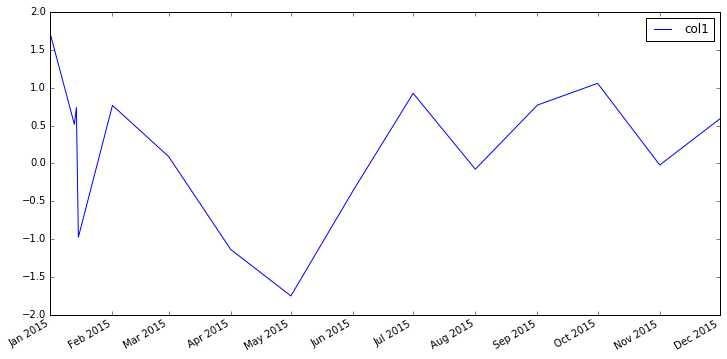

In [16]:
display(tmp)
tmp.plot.line(figsize = (12, 6))

Para evitar lo anterior podemos crear nuestro propio parser de fechas a, por ejemplo, `pd.read_csv`:

In [17]:
import datetime as dt
import io

def dateparser(date):
    date, time = date.split()
    DD, MM, YY = date.split('/')
    hh, mm = time.split(':')
    return dt.datetime(int(YY), int(MM), int(DD), int(hh), int(mm))

virtual_file = io.StringIO("""01/01/2015 00:00, 1
02/01/2015 00:00, 2
03/01/2015 00:00, 3
04/01/2015 00:00, 4
05/01/2015 00:00, 5
06/01/2015 00:00, 6
07/01/2015 00:00, 7
08/01/2015 00:00, 8
09/01/2015 00:00, 9
10/01/2015 00:00, 10
11/01/2015 00:00, 11
12/01/2015 00:00, 12
13/01/2015 00:00, 13
14/01/2015 00:00, 14
15/01/2015 00:00, 15
""")

tmp_wrong = pd.read_csv(virtual_file, parse_dates = [0], index_col = 0, names = ['Date', 'values'])

virtual_file = io.StringIO("""01/01/2015 00:00, 1
02/01/2015 00:00, 2
03/01/2015 00:00, 3
04/01/2015 00:00, 4
05/01/2015 00:00, 5
06/01/2015 00:00, 6
07/01/2015 00:00, 7
08/01/2015 00:00, 8
09/01/2015 00:00, 9
10/01/2015 00:00, 10
11/01/2015 00:00, 11
12/01/2015 00:00, 12
13/01/2015 00:00, 13
14/01/2015 00:00, 14
15/01/2015 00:00, 15
""")

tmp_right = pd.read_csv(virtual_file, parse_dates = True, index_col = 0, names = ['Date', 'values'],
                        date_parser = dateparser)

In [18]:
display(tmp_wrong)
display(tmp_right)

,values
Date,
2015-01-01,1
2015-02-01,2
2015-03-01,3
2015-04-01,4
2015-05-01,5
2015-06-01,6
2015-07-01,7
2015-08-01,8
2015-09-01,9


,values
Date,
2015-01-01,1
2015-01-02,2
2015-01-03,3
2015-01-04,4
2015-01-05,5
2015-01-06,6
2015-01-07,7
2015-01-08,8
2015-01-09,9


# Vamos a salvar el resultado en formato csv

In [29]:
opath = os.path.join('Datos', 'mast_2.csv')
#wind.to_csv(opath)
wind.iloc[0:100].to_csv(opath)

# ... o en formato json

In [30]:
#wind.to_json(opath.replace('csv', 'json'))
wind.iloc[0:100].to_json(opath.replace('csv', 'json'))

# ... o en una tabla HTML

In [31]:
# Si son muchos datos no os lo recomiendo, es lento
#wind.to_html(opath.replace('csv', 'html'))
wind.iloc[0:100].to_html(opath.replace('csv', 'html'))

# ... o en formato xlsx

Seguramente debáis instalar `xlsxwriter`, `openpyxl`, `wlrd/xlwt`,...

In [32]:
writer = pd.ExcelWriter(opath.replace('csv', 'xlsx'))
#wind.to_excel(writer, sheet_name= "Mi hoja 1")
wind.iloc[0:100].to_excel(writer, sheet_name= "Mi hoja 1")
writer.save()

In [ ]:
# Ahora que tenemos los ficheros en formato json, html, xlsx,..., podéis practicar a abrirlos con las
# funciones pd.read_*
